# Eye on the Vine Project

In this project, I will be performing a fungi segmentation task, focusing on identifying and delineating fungal structures in images using Convolutional Neural Networks (CNNs).

In [ ]:
#### source tf_env/bin/activate  -- activate virtual env

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [31]:
# reading the images

#list the image and mask files
image_paths_1 = [os.path.join(image_dir_1, f) for f in os.listdir(image_dir_1) if f.endswith('.png')]
mask_paths_1 = [os.path.join(mask_dir_1, f) for f in os.listdir(mask_dir_1) if f.endswith('.png')]

image_paths_2 = [os.path.join(image_dir_2, f) for f in os.listdir(image_dir_2) if f.endswith('.png')]
mask_paths_2 = [os.path.join(mask_dir_2, f) for f in os.listdir(mask_dir_2) if f.endswith('.png')]

# Combine all image and mask paths
image_paths = image_paths_1 + image_paths_2
mask_paths = mask_paths_1 + mask_paths_2

In [32]:
# Function to load and preprocess the image and mask
def load_image_and_mask(image_path, mask_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)  # Decode as RGB
    image = tf.image.resize(image, [128, 128])  # Resize to 128x128
    image = image / 255.0  # Normalize to [0, 1]

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)  # Decode as grayscale
    mask = tf.image.resize(mask, [128, 128])  # Resize to 128x128
    mask = mask / 255.0  # Normalize to [0, 1]

    return image, mask

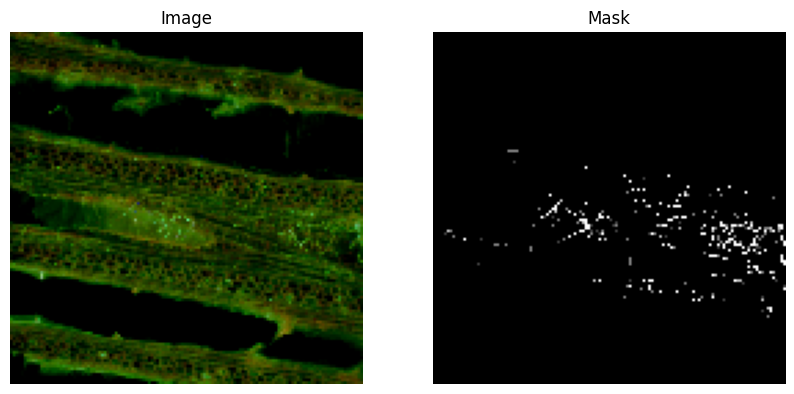

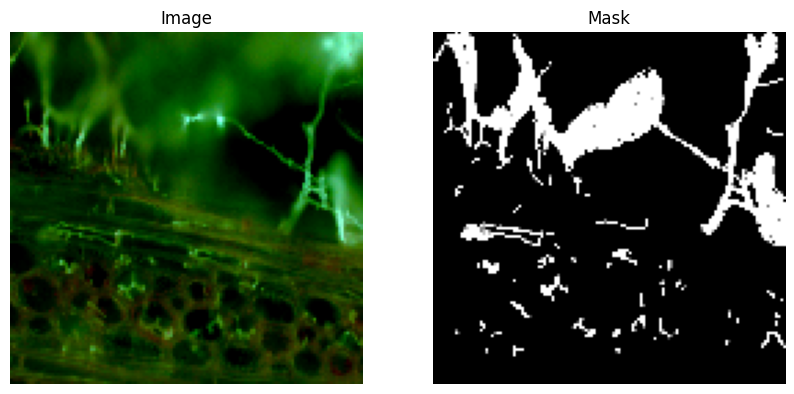

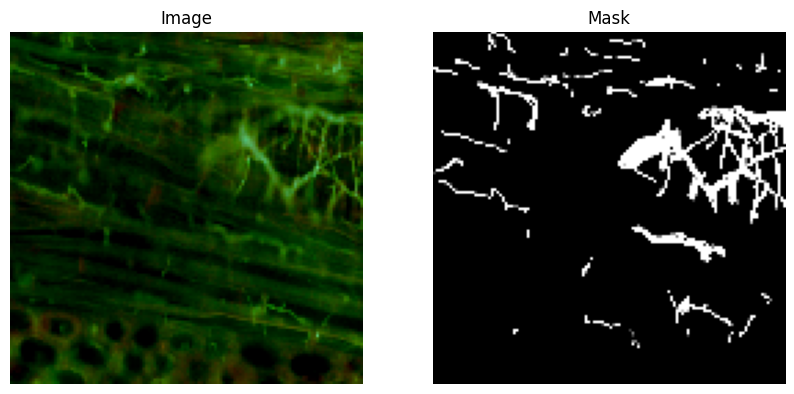

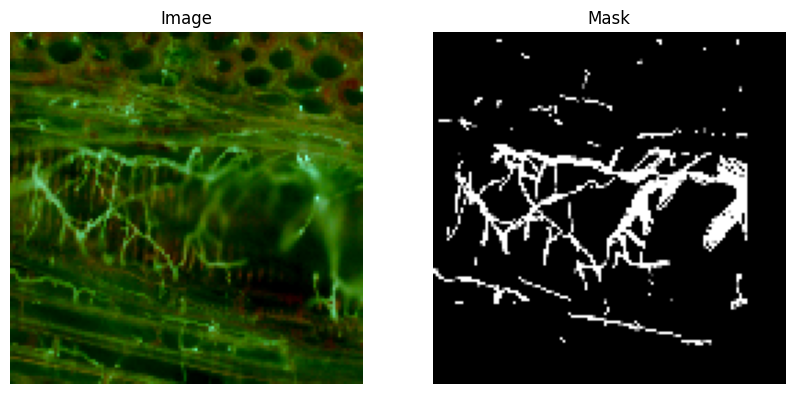

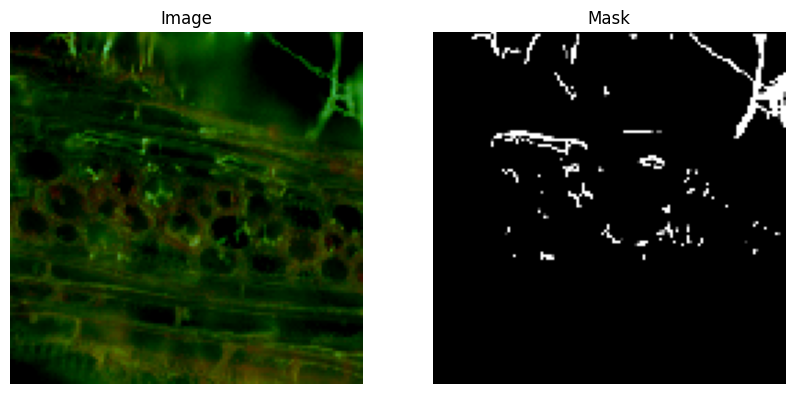

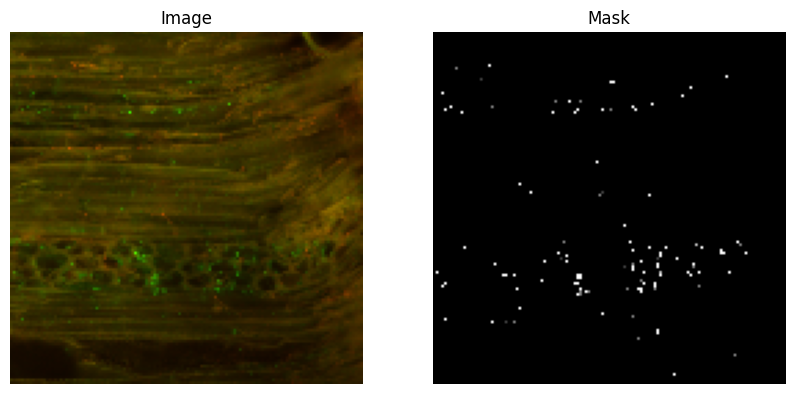

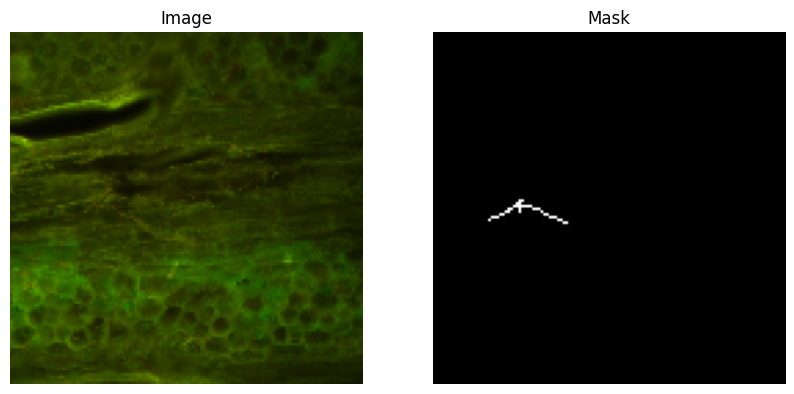

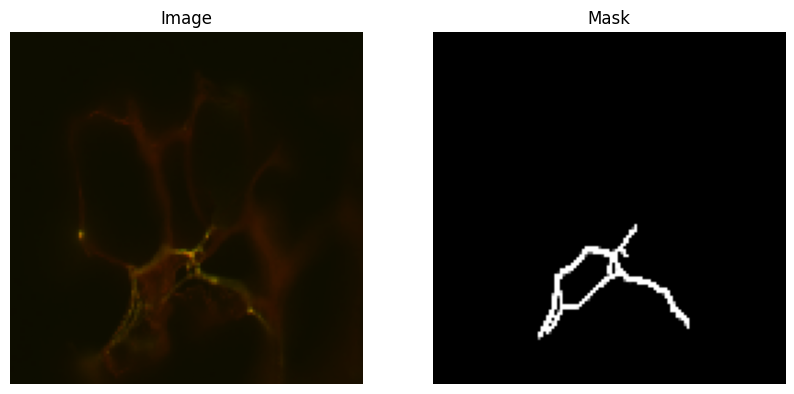

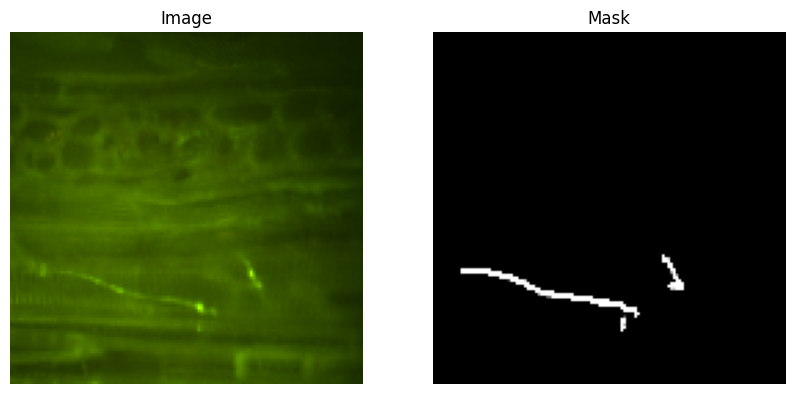

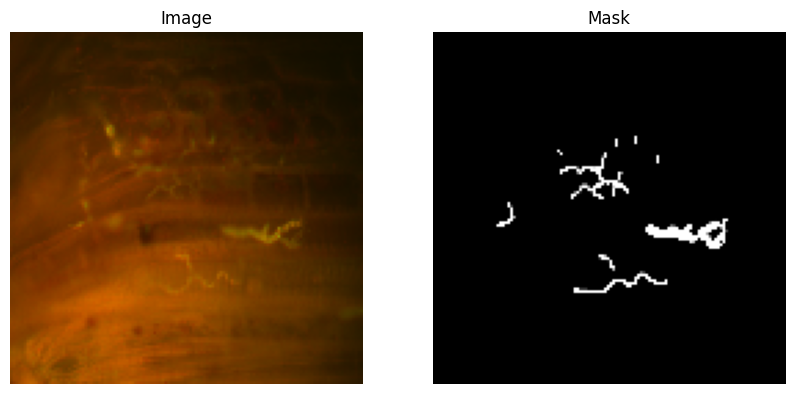

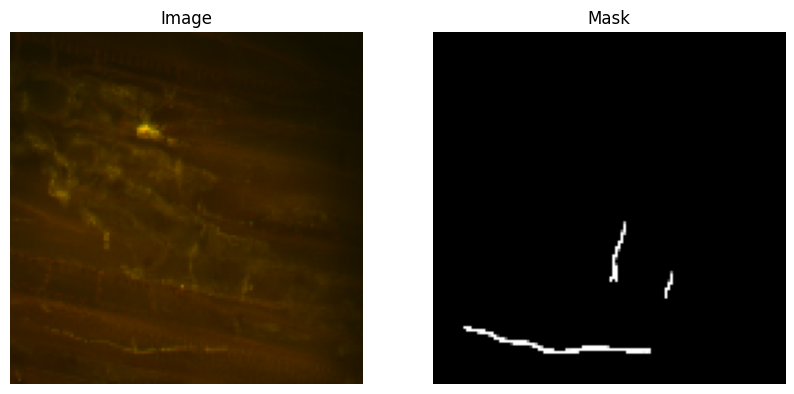

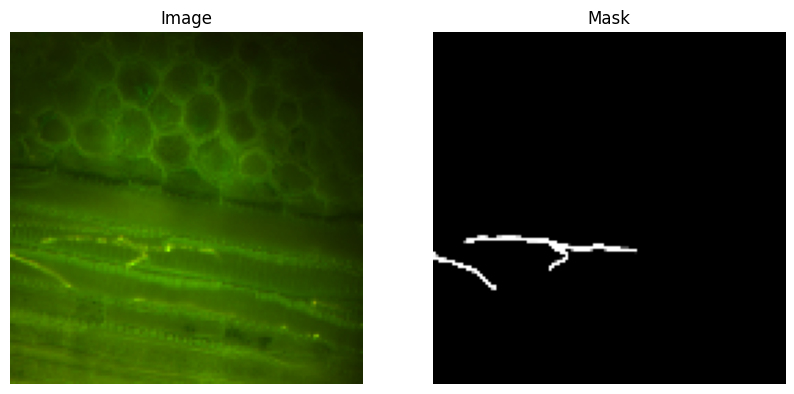

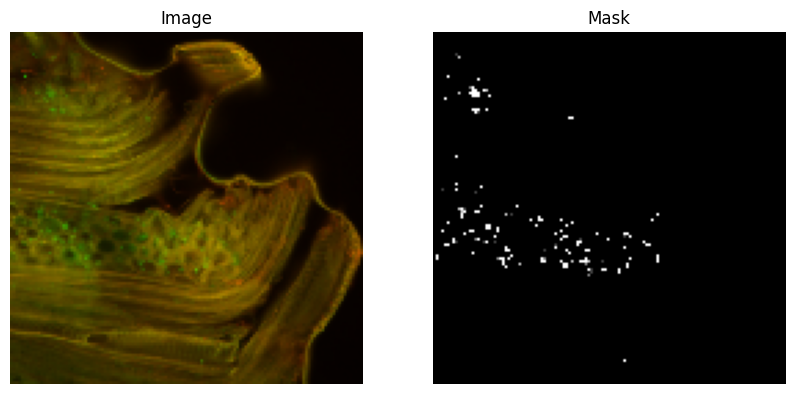

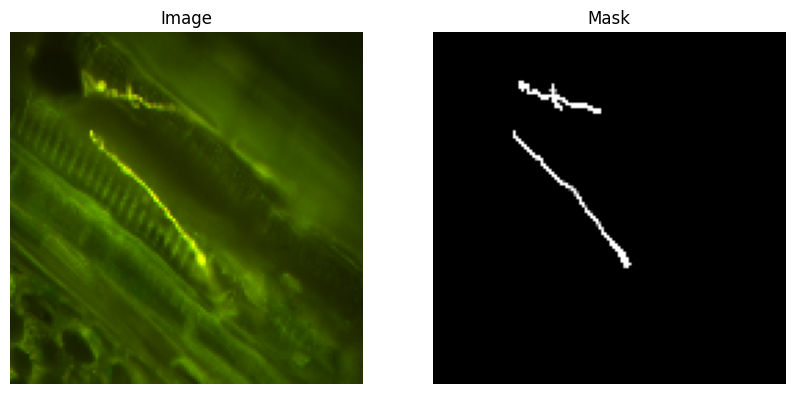

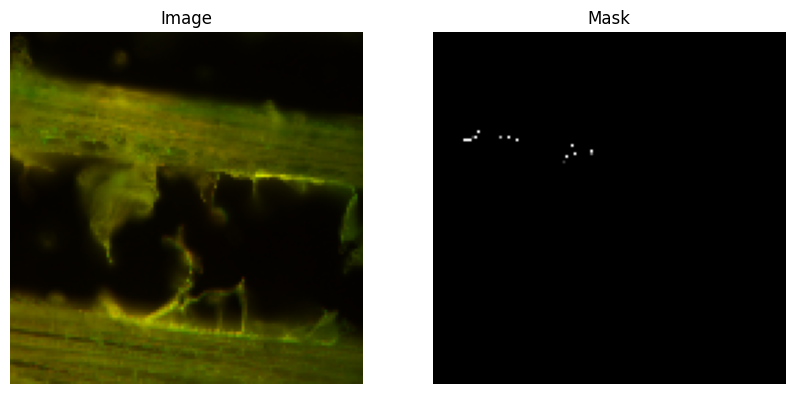

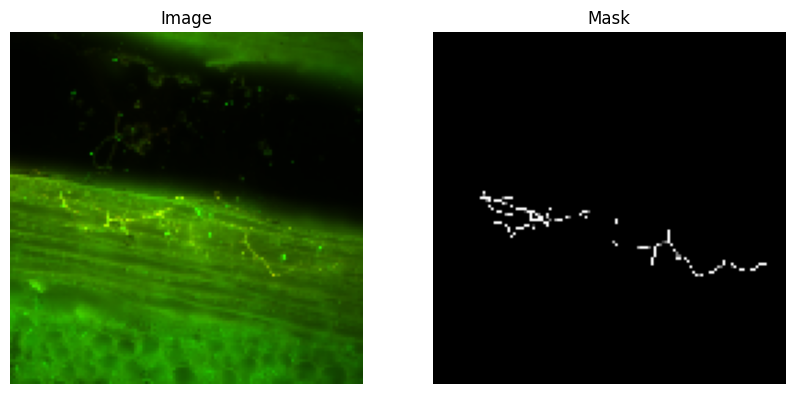

In [34]:
# Iterate over all the images and display them
def display_images(image_paths, mask_paths, num_images=16):
    for i in range(num_images):
        # Load image and mask
        image_path = image_paths[i]
        mask_path = mask_paths[i]
        image, mask = load_image_and_mask(image_path, mask_path)
        
        # Plotting the image and mask
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Display image
        axes[0].imshow(image)
        axes[0].set_title("Image")
        axes[0].axis('off')

        # Display mask
        axes[1].imshow(mask, cmap='gray')
        axes[1].set_title("Mask")
        axes[1].axis('off')

        plt.show()

# Display all images and their corresponding masks
display_images(image_paths, mask_paths, num_images=16)